In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def boolize(x):
    map_dict = {'Yes': True, 
                'No' : False,
                'Unclear': True
               }
    ret = []
    for item in x:
        ret.append(map_dict[item])
    return ret

def dice_score(x,y):
    num = 2*len(np.intersect1d(x,y))
    denom = len(x)+len(y)
    return num/denom

In [3]:
loc_lat = pd.read_csv(ospj('Review of our stim seizures - LFS.csv')).drop(['Patient','Unnamed: 23'],axis=1)
loc_lat.dropna(how = 'any',subset=['Stim seizure contact'],inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Review of our stim seizures - LFS.csv'

In [ ]:
loc_lat.columns

Index(['hupsubjno', 'Implant coverage', 'Spontaneous SOZ', 'emuimplant_soz',
       'ieeg_ictal_onset_electrodes', 'ieeg_ictal_onset_anat_lat',
       'ieeg_ictal_onset_anat_spec', 'cceps_run1_pulsewidth', 'cceps_run1_sz',
       'Stim seizure contact', 'cceps_run1_soz_electrodes', 'Stim SOZ',
       'Concordant lat?', 'Concordant loc?',
       'Was there stim contralateral to seizure site?', 'cceps_run1_szelecs',
       'cceps_run1_soz_electrodes.1', 'cceps_run1_seizure_typical',
       'Typical semiology?', 'Semiology notes', 'Complications', 'Math'],
      dtype='object')

In [4]:
loc_lat[loc_lat.columns[:14]].head(20)

NameError: name 'loc_lat' is not defined

In [5]:
concordance = loc_lat[['Concordant lat?','Concordant loc?']].apply(boolize)
concordance["combined"] = pd.DataFrame(concordance['Concordant lat?'] & concordance['Concordant loc?'])

NameError: name 'loc_lat' is not defined

NameError: name 'concordance' is not defined

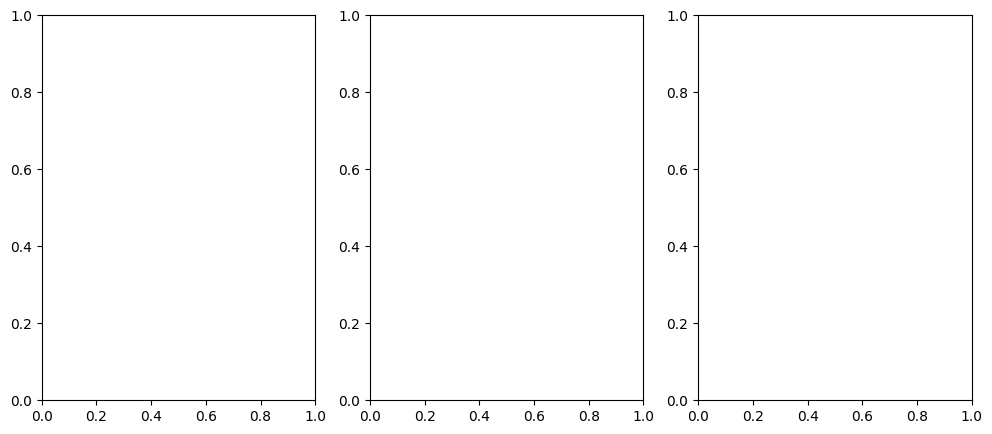

In [6]:
fig,axs = plt.subplots(1,3,figsize=(12,5))
to_plot = concordance.groupby('Concordant lat?')[['Concordant lat?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant lat?'],ax=axs[0])
# obs = concordance.groupby('Concordant lat?')[['combined']].count()
obs = concordance['Concordant lat?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue
# plt.ylabel('Patients')
plt.xlabel('Lat Concordance')
axs[0].set_title(f'p-value: {p}')

to_plot = concordance.groupby('Concordant loc?')[['Concordant loc?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant loc?'],ax=axs[1]) 
# obs = concordance.groupby('Concordant loc?')[['combined']].count()
obs = concordance['Concordant loc?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

# plt.ylabel('Patients')
plt.xlabel('Loc Concordance')
axs[1].set_title(f'p-value: {p}')

to_plot = concordance.groupby('combined')[['combined']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['combined'],ax=axs[2],palette = ['blue','red'])
# obs = concordance.groupby('combined')[['combined']].count()
obs = concordance.combined
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

plt.xlabel('Total Concordance')
axs[2].set_title(f'p-value: {p}')